# Example for running an LCA in AeroMAPS

## Import librairies and configuration

In [2]:
# --- Import libraries ---
%matplotlib widget
import sys
sys.path.insert(0, './utils/')
import pandas as pd
import brightway2 as bw
import lca_algebraic as agb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import math
import collections
import time
from plots import plot_stacked_evolution_subplots
plt.style.use("bmh")

# --- Aeromaps models and processes ---
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_top_down_interp,
    models_energy_with_fuel_effect,
    models_offset,
    models_climate_fair,
    models_energy_cost,
    models_operation_cost_top_down,
    models_abatements_cost_simplified,
)
from aeromaps.models.impacts.life_cycle_assessment.life_cycle_assessment import LifeCycleAssessmentJSON

## Set models

In [14]:
# --- Set AeroMAPS models for this simulation ---
models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down_interp": models_efficiency_top_down_interp,
    "models_energy_with_fuel_effect": models_energy_with_fuel_effect,
    "models_offset": models_offset,
    "models_climate_fair": models_climate_fair,
    "models_energy_cost": models_energy_cost,
    "models_operation_cost_top_down": models_operation_cost_top_down,
    "models_abatements_cost_simplified": models_abatements_cost_simplified,
    "life_cycle_assessment": LifeCycleAssessmentJSON(
        json_file="./data/lca_data/precompiled_model/lca_model.json", split_by="phase"
    ),
}

Import LCA Parameters:   0%|          | 0/26 [00:00<?, ?it/s]

Import LCIA functions (axis 'phase'):   0%|          | 0/24 [00:00<?, ?it/s]

Import functional units:   0%|          | 0/1 [00:00<?, ?it/s]

Import impacts metadata:   0%|          | 0/24 [00:00<?, ?it/s]

## Create process

In [15]:
# --- Create process for IS scenario ---
process = create_process(
    configuration_file="data/config_files/config_is2medium.json",  # <-- select LTAG IS scenario (from 0 to 3)
    models=models,
)

⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: reference pathway for CAC (fossil_kerosene is not defined as bottom-up, using top-down values for CAC computation.


## Run AeroMAPS simulation and assessment

In [16]:
# --- Run assessment ---
start_time = time.time()
process.compute()
process.write_json()
print("--- %s seconds ---" % (time.time() - start_time))

Running MDA
⚠️ Warning: excess generic_biofuel production in years: [2021]. Scaling down.


/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:91: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:122: UserWarning: 
[Interpolation Model: generic_electricity_availability_global Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:122: UserWarning: 
[Interpolation Model: generic_biomass_availability_global Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant fo

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

--- 7.026216983795166 seconds ---


/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:122: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:122: UserWarning: 
[Interpolation Model: electrolysis_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(


## Visualize LCA results

In [18]:
# --- Plot results ---
process_data_vector_outputs = process.data["vector_outputs"]
process_data_float_inputs = process.data["float_inputs"]
process_data_climate = process.data["climate_outputs"]
lca_outputs = process.data["lca_outputs"]
lca_outputs

<xarray.DataArray 'lca' (systems: 1, impacts: 24, axis: 15, year: 71)> Size: 204kB
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [3.38839475e+07, 3.36467298e+07, 3.34095122e+07, ...,
          2.29494777e+07, 2.28927609e+07, 2.28360441e+07],
         [5.10679457e+08, 4.97890244e+08, 5.00891738e+08, ...,
          3.57311389e+08, 3.57632263e+08, 3.57749165e+08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.80397359e+09, 1.91250522e+09, 2.02444352e+09]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
         [2.46834015e+01, 2.45093669e+01, 2.43353322e+01, ...,
          1.59304373e+01, 1.58696389e+01, 1.58088404e+01],
         [5.05174771e+02, 4.92927392e+02, 4.96307821e+02, ...,
          3.59547108e+02, 3.59735864e+02, 3.59719098e+02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.61776752e+02, 3.78728073e+02, 3.95767499e+02]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [5.71811829e+05, 5.59161073e+05, 5.64221513e+05, ...,
          4.56223508e+05, 4.56949033e+05, 4.57414766e+05],
         ...,
         [8.17624460e+03, 8.11857871e+03, 8.06091282e+03, ...,
          5.27596316e+03, 5.25581623e+03, 5.23566930e+03],
         [1.67273859e+05, 1.63218221e+05, 1.64337271e+05, ...,
          1.19043414e+05, 1.19105783e+05, 1.19100105e+05],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.19891131e+05, 1.25510004e+05, 1.31158232e+05]]]])
Coordinates:
  * systems  (systems) object 8B 'model'
  * impacts  (impacts) object 192B ('ReCiPe 2016 v1.03, midpoint (H)', 'acidi...
  * axis     (axis) object 120B 'CO2_biofuel' ... 'e_fuel_production'
  * year     (year) float64 568B 2e+03 2.001e+03 ... 2.069e+03 2.07e+03

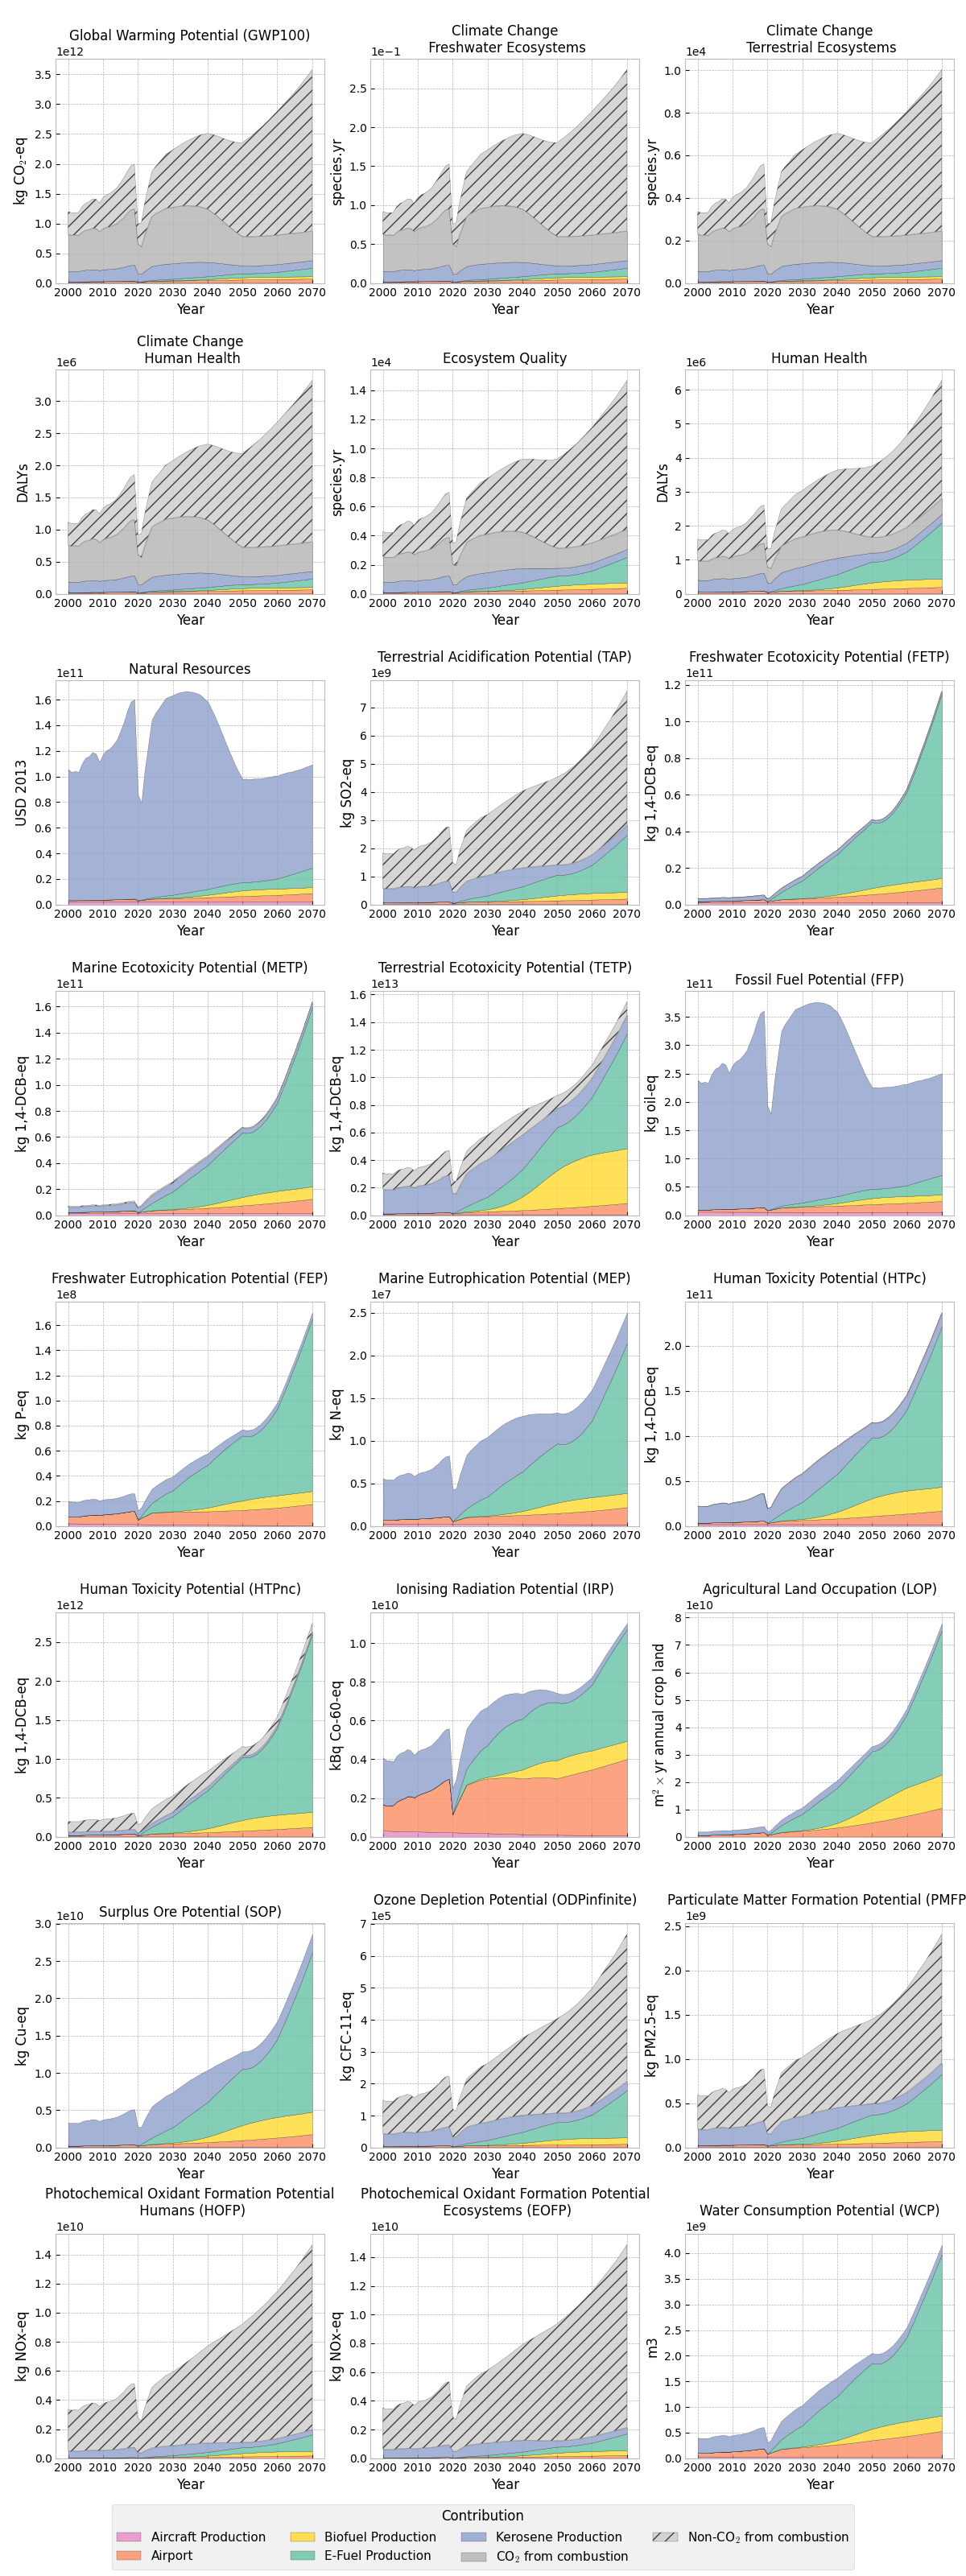

In [20]:
# Plot
plt.close()
plot_stacked_evolution_subplots(lca_outputs)